# Detección de objetos

La detección de objetos es una tecnología de la computación relacionada con la visión por computadora y el procesamiento de imágenes que se ocupa de detectar instancias de objetos semánticos de una determinada clase (como seres humanos, edificios o coches) en imágenes y vídeos digitales. 


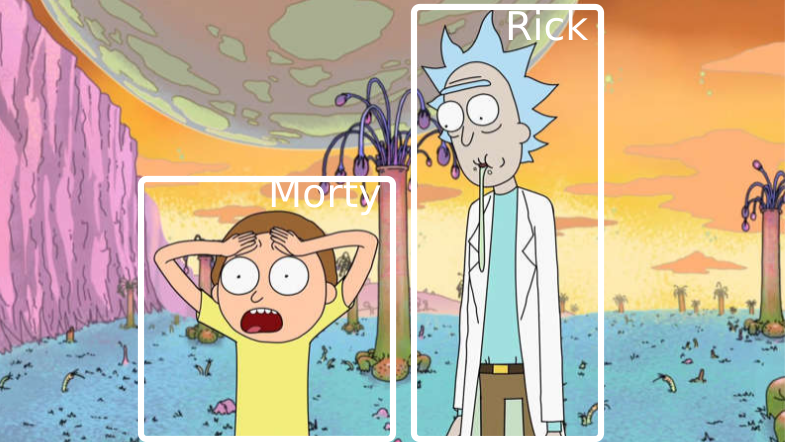

## Aplicaciones

Video vigilancia

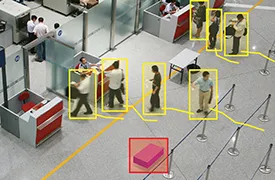

Conteo de personas

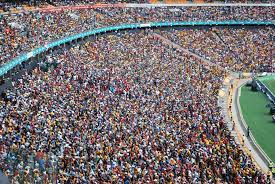

Conducción autónoma

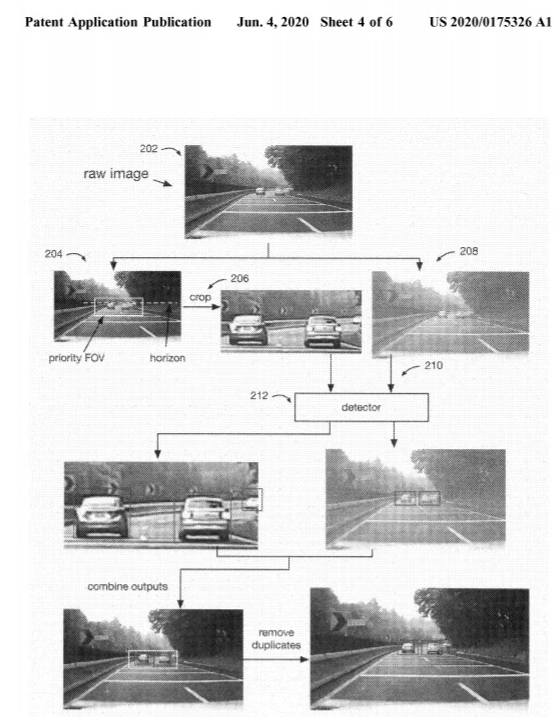

Tracking

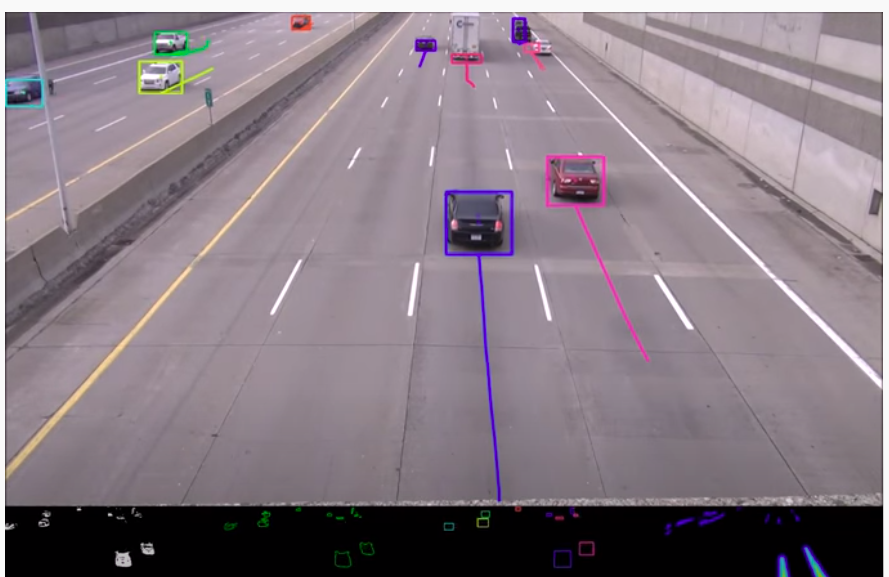

Defects detection

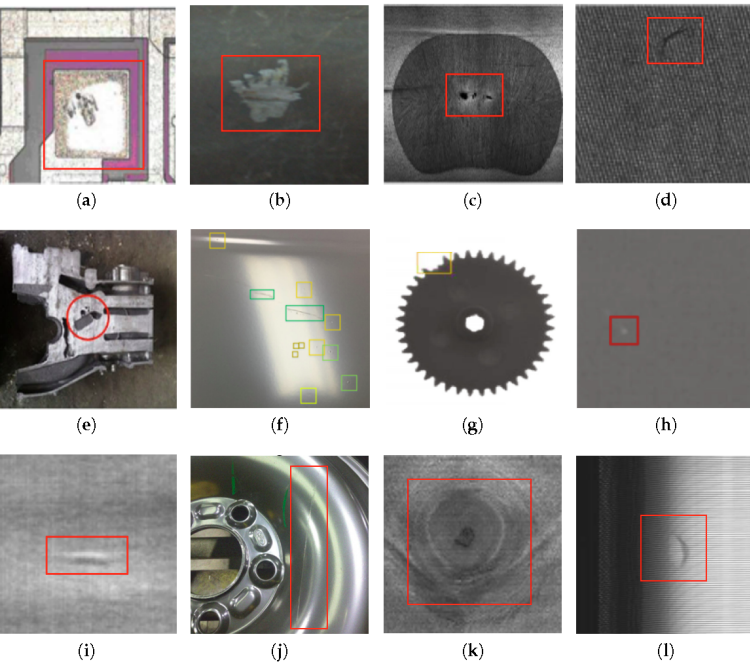

Detection de rostros

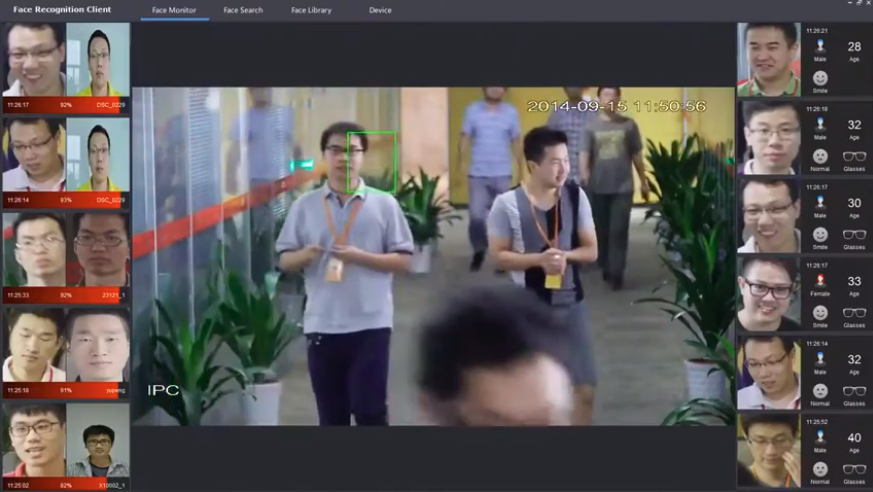

Detección de vehículos

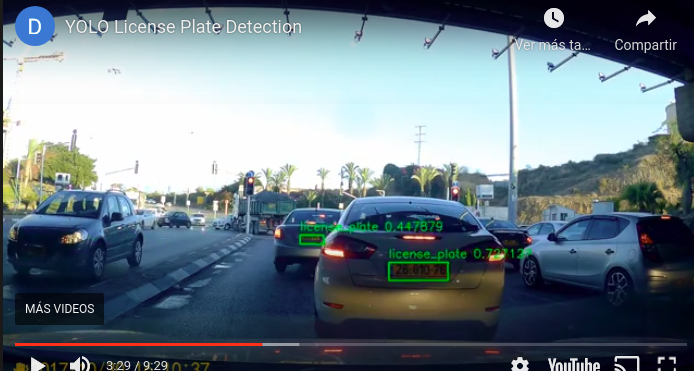

Detección de imágenes online 

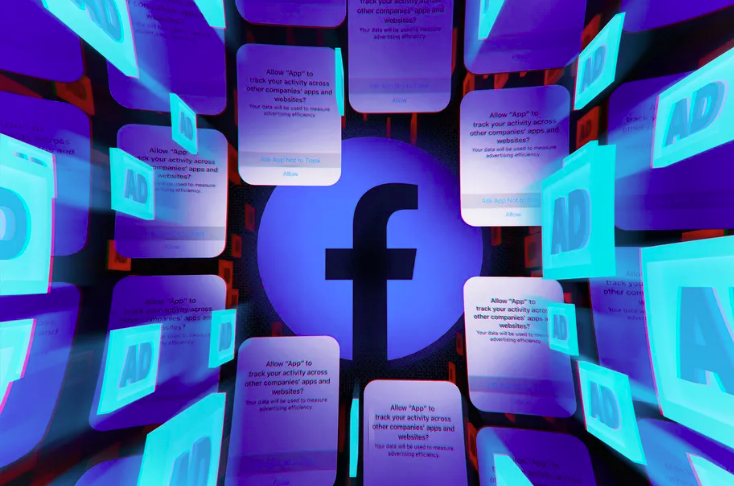

Podemos pensar en un clasificador como:
- Una imagen entra
- Una etiqueta de clase sale

¿Cómo definirían un detector?

- Una imagen entra
- Uno o múltiples cuadros delimitadores (bounding boxes)  con sus respectivas etiquetas de clase.

Más en concreto:

En el fondo, cualquier algoritmo de detección de objetos sigue el mismo patrón:

- Entrada: Una imagen a la que queremos aplicar la detección de objetos
- Salida: Tres valores, que incluyen:
  - Una lista de cajas delimitadoras, o las coordenadas (x, y) de cada objeto de la imagen
  - La etiqueta de clase asociada a cada uno de los cuadros delimitadores
  - La puntuación de probabilidad/confianza asociada a cada cuadro delimitador y a la etiqueta de clase

## ¡Hagamos nuestro propio detector de objetos!

¿Qué se les ocurre hacer?

¿Como usariamos el clasificador de perros y gatos para detectar perros y gatos?

¡Algunas ideas!

- Deslizar el clasificador sobre la imagen

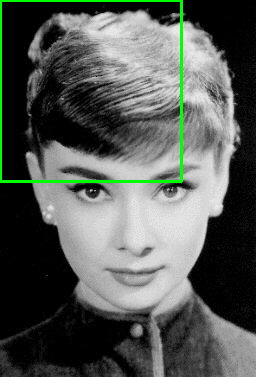

- Usar representaciones multiescala

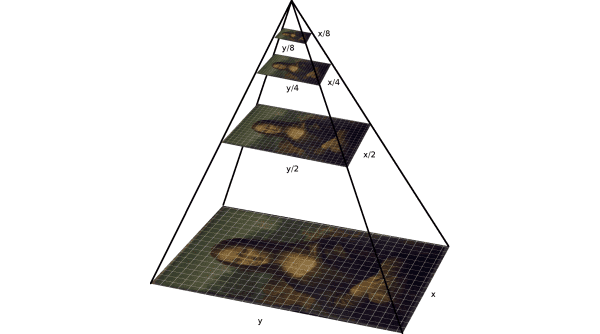

- Usar supresion de  no máximos o alguna técnica para evitar múltiples detecciones

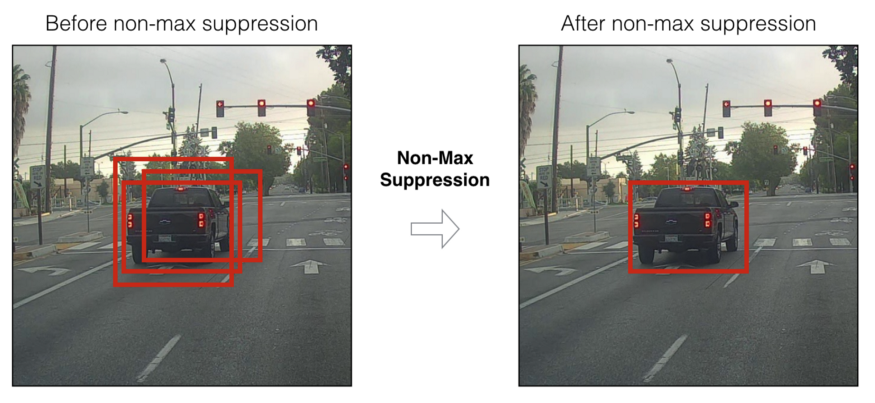

Antes de explicar hay que conocer el concepto de IoU

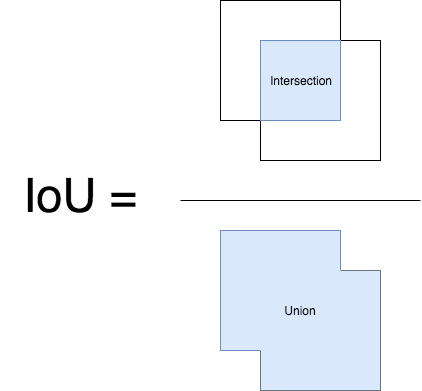

**Entrada**: Una lista de cuadros propuestos B, las correspondientes puntuaciones de confianza S y el umbral de solapamiento N.

**Salida**: Una lista de propuestas filtradas D.

**Algoritmo**:

- Seleccionar la propuesta con la mayor puntuación de confianza, eliminarla de B y añadirla a la lista final de propuestas D. (Inicialmente D está vacía).

- Ahora compara esta propuesta con todas las propuestas - calcula el IOU (Intersección sobre Unión) de esta propuesta con todas las demás. Si el IOU es mayor que el umbral N, elimine esa propuesta de B.

- Una vez más, tome la propuesta con la mayor confianza de las propuestas restantes en B, elimínela de B y añádala a D.

- Una vez más, se calcula el IOU de esta propuesta con todas las propuestas de B y se eliminan las casillas que tienen un IOU superior al umbral.

Este proceso se repite hasta que no queden más propuestas en B.


Propuesta algoritmo

Paso 1: Introducir una imagen

Paso #2: Construir una pirámide de imágenes

Paso #3: Para cada escala de la pirámide de imágenes, ejecutar una ventana deslizante

Paso #3a: Para cada paso de la ventana deslizante, extraer el ROI

Paso #3b: Tomar el ROI y pasarlo por nuestra CNN originalmente entrenada para la clasificación de imágenes

Paso #3c: Examinar la probabilidad de la etiqueta de clase superior de la CNN, y si cumple con la confianza mínima, registrar (1) la etiqueta de clase y (2) la ubicación de la ventana deslizante

Paso #4: Aplicar la supresión de los no-máximos de la clase a los cuadros delimitadores

Paso #5: Devolver los resultados a la función de llamada

## ¡A programar!

Usaremos esta imagen para probar el detector

In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/DL_course/'

In [ ]:
import cv2

img_perros = cv2.cvtColor(cv2.imread(path + 'perros.jpg'), cv2.COLOR_BGR2RGB)
img_perros.shape

(800, 1200, 3)

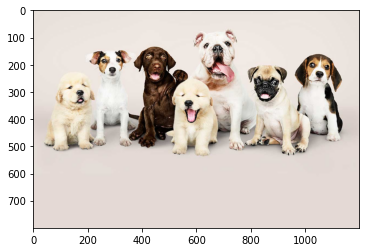

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(img_perros)

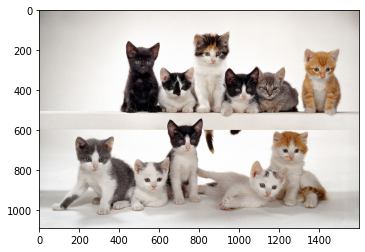

In [ ]:
img_gatos = cv2.cvtColor(cv2.imread(path + 'gatos.jpg'), cv2.COLOR_BGR2RGB)
img_gatos.shape

plt.imshow(img_gatos)